<a href="https://colab.research.google.com/github/Elixirman/Blackbox/blob/main/E_Signing_of_Customers_on_F_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data Preprocessing







## Importing Libraries & Dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
f_data = pd.read_csv ("Financial-Data.csv")

## Data Exploration

In [ ]:
f_data.head(-5)

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17898,2150976,39,bi-weekly,1,5215,0,5,2,5,3,...,600,38200,0.763789,0.737341,0.601577,0.617802,0.666175,0.766175,5,0
17899,6799343,37,bi-weekly,0,3265,0,4,1,5,2,...,1200,67950,0.715218,0.911429,0.606896,0.790531,0.431665,0.531665,2,1
17900,7100872,31,weekly,0,3015,0,2,1,2,2,...,450,42450,0.643778,0.901396,0.632284,0.856231,0.666399,0.566399,6,1
17901,1807355,44,bi-weekly,0,5025,6,2,3,6,3,...,500,54500,0.711895,0.911418,0.522509,0.712864,0.484913,0.584913,9,0


In [ ]:
f_data.shape

(17908, 21)

In [ ]:
f_data.columns

Index(['Entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [ ]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [ ]:
# Statistical Summary
f_data.describe()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622973,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


## Dealing With Missing Values ( NaN & null)

In [ ]:
f_data.isnull().values.any()

False

In [ ]:
f_data.isnull().values.sum()

0

In [ ]:
f_data.isna().values.any()

False

In [ ]:
f_data.isna().values.sum()

0

##Encoding The Categorical Data (One Hot Encoding)

In [ ]:
# Check columns with categorical data

f_data.select_dtypes(include= "object").columns

Index(['pay_schedule'], dtype='object')

In [ ]:
len (f_data.select_dtypes(include= "object").columns)

1

In [ ]:
# Checking The Unique Variables in the Categorical Column

f_data["pay_schedule"].unique()

array(['bi-weekly', 'weekly', 'semi-monthly', 'monthly'], dtype=object)

In [ ]:
len(f_data["pay_schedule"].unique())

4

In [ ]:
# Or "nunique" for the number of Unique values

f_data["pay_schedule"].nunique()

4

In [ ]:
f_data.shape

(17908, 21)

In [ ]:
# Now Encode the Categorical values

f_data_ohe = pd.get_dummies(data= f_data, drop_first= True)

In [ ]:
f_data_ohe.head(-5)

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17898,2150976,39,1,5215,0,5,2,5,3,1,...,0.737341,0.601577,0.617802,0.666175,0.766175,5,0,0,0,0
17899,6799343,37,0,3265,0,4,1,5,2,1,...,0.911429,0.606896,0.790531,0.431665,0.531665,2,1,0,0,0
17900,7100872,31,0,3015,0,2,1,2,2,0,...,0.901396,0.632284,0.856231,0.666399,0.566399,6,1,0,0,1
17901,1807355,44,0,5025,6,2,3,6,3,1,...,0.911418,0.522509,0.712864,0.484913,0.584913,9,0,0,0,0


In [ ]:
f_data_ohe.shape

(17908, 23)

In [ ]:
# Check for any Categorical Value

len(f_data_ohe.select_dtypes(include= "object").columns)

0

## Countplot

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='e_signed', ylabel='count'>

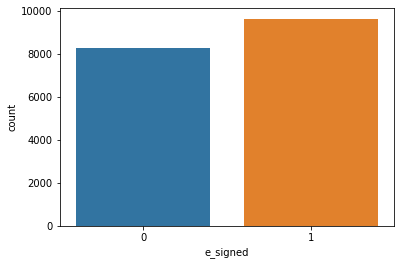

In [ ]:
sns.countplot(f_data_ohe["e_signed"])

In [ ]:
# Getting e_signed values

u = (f_data_ohe.e_signed == 0).sum()
v = (f_data_ohe.e_signed == 1).sum()



In [ ]:
print("Not Signed is: {}\n Signed is: {}".format(u, v))

Not Signed is: 8269
 Signed is: 9639


## Dataset Restructuring

In [ ]:
# Combining "months_employed" and "years_employed"

f_data_ohe["months_Employed"] = (f_data_ohe.months_employed + f_data_ohe.years_employed * 12)

In [ ]:
# Check for new Column

f_data_ohe.head(-5)

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months_Employed
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17898,2150976,39,1,5215,0,5,2,5,3,1,...,0.601577,0.617802,0.666175,0.766175,5,0,0,0,0,60
17899,6799343,37,0,3265,0,4,1,5,2,1,...,0.606896,0.790531,0.431665,0.531665,2,1,0,0,0,48
17900,7100872,31,0,3015,0,2,1,2,2,0,...,0.632284,0.856231,0.666399,0.566399,6,1,0,0,1,24
17901,1807355,44,0,5025,6,2,3,6,3,1,...,0.522509,0.712864,0.484913,0.584913,9,0,0,0,0,30


In [ ]:
# Droping Columns' "months_employed" and "years_employed"


In [ ]:
f_data_1 = f_data_ohe.drop (columns= ["months_employed" , "years_employed"])

In [ ]:
f_data_1.head(-5)

,Entry_id,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months_Employed
0,7629673,40,1,3135,3,6,2,1,550,36200,...,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36
1,3560428,61,0,3180,3,2,7,1,600,30150,...,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72
2,6934997,23,0,1540,0,7,1,1,450,34550,...,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6
3,5682812,40,0,5230,1,2,7,1,700,42150,...,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72
4,5335819,33,0,3590,2,2,8,1,1100,53850,...,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17898,2150976,39,1,5215,2,5,3,1,600,38200,...,0.601577,0.617802,0.666175,0.766175,5,0,0,0,0,60
17899,6799343,37,0,3265,1,5,2,1,1200,67950,...,0.606896,0.790531,0.431665,0.531665,2,1,0,0,0,48
17900,7100872,31,0,3015,1,2,2,0,450,42450,...,0.632284,0.856231,0.666399,0.566399,6,1,0,0,1,24
17901,1807355,44,0,5025,3,6,3,1,500,54500,...,0.522509,0.712864,0.484913,0.584913,9,0,0,0,0,30


In [ ]:
f_data_1.shape

(17908, 22)

In [ ]:
# Combining "personal_account_m" and "personal_account_y"

f_data_1["account_months"] = (f_data_1.personal_account_m + f_data_1.personal_account_y * 12)

In [ ]:
f_data_1.head(-5)

,Entry_id,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months_Employed,account_months
0,7629673,40,1,3135,3,6,2,1,550,36200,...,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,2,7,1,600,30150,...,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,7,1,1,450,34550,...,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,2,7,1,700,42150,...,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,2,8,1,1100,53850,...,0.665523,0.744634,0.744634,12,0,0,1,0,60,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17898,2150976,39,1,5215,2,5,3,1,600,38200,...,0.617802,0.666175,0.766175,5,0,0,0,0,60,41
17899,6799343,37,0,3265,1,5,2,1,1200,67950,...,0.790531,0.431665,0.531665,2,1,0,0,0,48,29
17900,7100872,31,0,3015,1,2,2,0,450,42450,...,0.856231,0.666399,0.566399,6,1,0,0,1,24,26
17901,1807355,44,0,5025,3,6,3,1,500,54500,...,0.712864,0.484913,0.584913,9,0,0,0,0,30,42


In [ ]:
# Droping Columns' "months_employed" and "years_employed"

In [ ]:
f_data_2 = f_data_1.drop (columns= ["personal_account_m" , "personal_account_y"])

In [ ]:
f_data_2.head(-5)

,Entry_id,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months_Employed,account_months
0,7629673,40,1,3135,3,1,550,36200,0.737398,0.903517,...,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,1,600,30150,0.738510,0.881027,...,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,1,450,34550,0.642993,0.766554,...,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,1,700,42150,0.665224,0.960832,...,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,1,1100,53850,0.617361,0.857560,...,0.665523,0.744634,0.744634,12,0,0,1,0,60,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17898,2150976,39,1,5215,2,1,600,38200,0.763789,0.737341,...,0.617802,0.666175,0.766175,5,0,0,0,0,60,41
17899,6799343,37,0,3265,1,1,1200,67950,0.715218,0.911429,...,0.790531,0.431665,0.531665,2,1,0,0,0,48,29
17900,7100872,31,0,3015,1,0,450,42450,0.643778,0.901396,...,0.856231,0.666399,0.566399,6,1,0,0,1,24,26
17901,1807355,44,0,5025,3,1,500,54500,0.711895,0.911418,...,0.712864,0.484913,0.584913,9,0,0,0,0,30,42


## Correlation Matrix & Heatmap

In [ ]:
# Define a new datset and drop columns, "Entry_id" & "e_signed"

In [ ]:
f_data_3 = f_data_2.drop (columns= ["Entry_id" , "e_signed"])

In [ ]:
f_data_3.head(-5)

,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months_Employed,account_months
0,40,1,3135,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,0,0,0,36,30
1,61,0,3180,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,1,72,86
2,23,0,1540,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,1,6,19
3,40,0,5230,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,0,0,0,72,86
4,33,0,3590,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,1,0,60,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17898,39,1,5215,2,1,600,38200,0.763789,0.737341,0.601577,0.617802,0.666175,0.766175,5,0,0,0,60,41
17899,37,0,3265,1,1,1200,67950,0.715218,0.911429,0.606896,0.790531,0.431665,0.531665,2,0,0,0,48,29
17900,31,0,3015,1,0,450,42450,0.643778,0.901396,0.632284,0.856231,0.666399,0.566399,6,0,0,1,24,26
17901,44,0,5025,3,1,500,54500,0.711895,0.911418,0.522509,0.712864,0.484913,0.584913,9,0,0,0,30,42


<AxesSubplot:title={'center':'Independent Variable Correlation with Dependent Variable -e_signed'}>

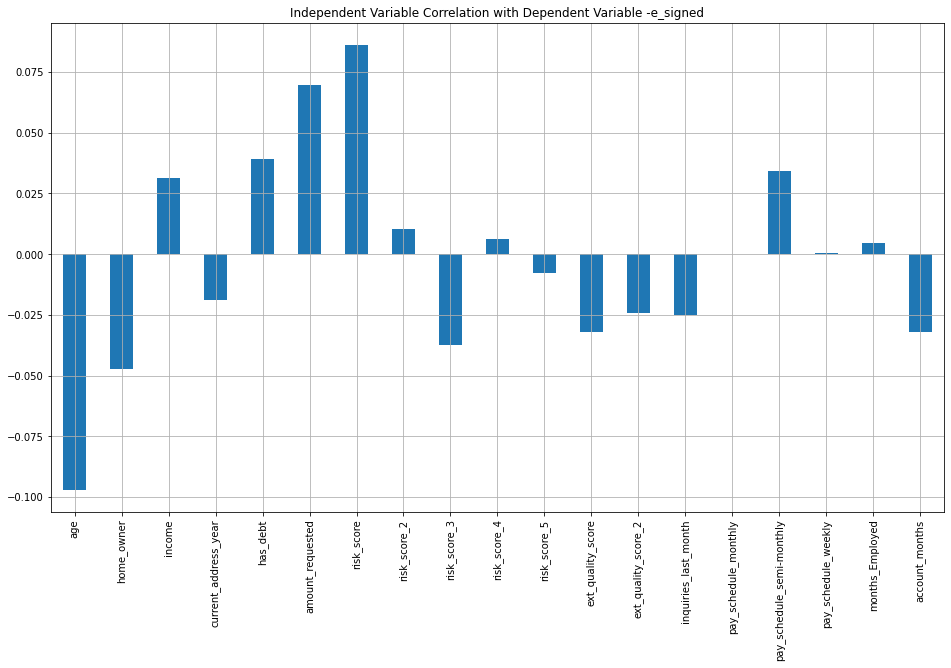

In [ ]:
f_data_3.corrwith(f_data_2["e_signed"]).plot.bar(
    figsize= (16,9), title= "Independent Variable Correlation with Dependent Variable -e_signed", grid= True


)

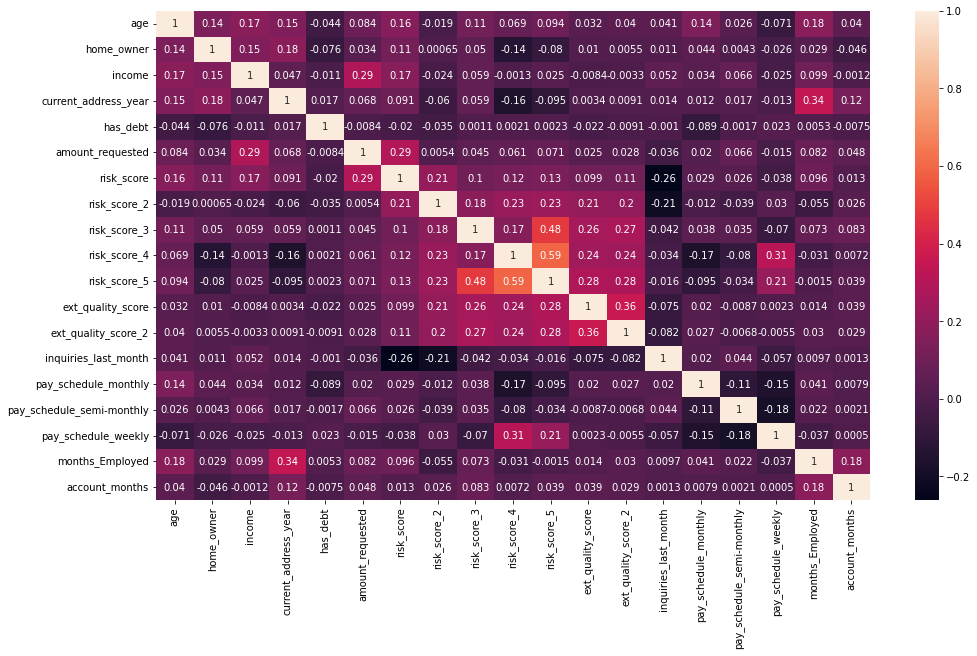

In [ ]:
# Heatmap Creation
plt.figure(figsize= (16,9))
ax = sns.heatmap(f_data_3.corr(), annot= True)

## Dataset Splitting

In [ ]:
f_data_3.head(-5)

,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months_Employed,account_months
0,40,1,3135,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,0,0,0,36,30
1,61,0,3180,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,1,72,86
2,23,0,1540,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,1,6,19
3,40,0,5230,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,0,0,0,72,86
4,33,0,3590,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,1,0,60,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17898,39,1,5215,2,1,600,38200,0.763789,0.737341,0.601577,0.617802,0.666175,0.766175,5,0,0,0,60,41
17899,37,0,3265,1,1,1200,67950,0.715218,0.911429,0.606896,0.790531,0.431665,0.531665,2,0,0,0,48,29
17900,31,0,3015,1,0,450,42450,0.643778,0.901396,0.632284,0.856231,0.666399,0.566399,6,0,0,1,24,26
17901,44,0,5025,3,1,500,54500,0.711895,0.911418,0.522509,0.712864,0.484913,0.584913,9,0,0,0,30,42


In [ ]:
# Define the Independent Variables / Matrix of Features

x = f_data_3

In [ ]:
# Dependent / Target Variables

y = f_data_2["e_signed"]

## Library Importation

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size= 0.2, random_state= 0)

In [ ]:
c = x_train.shape
d = x_test.shape
e = y_train.shape
f = y_test.shape

print("c: {} \nd: {} \ne: {} \nf: {} ".format(c, d,e,f))


c: (14326, 19) 
d: (3582, 19) 
e: (14326,) 
f: (3582,) 


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create an instance
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_test

array([[-1.01378918, -0.85634884, -0.24235846, ..., -0.50586115,
        -1.18309754, -0.32423091],
       [-1.01378918, -0.85634884, -0.33557695, ..., -0.50586115,
        -0.28443207,  0.19566597],
       [ 0.24595822, -0.85634884, -0.59858627, ..., -0.50586115,
         2.86089705, -0.84412778],
       ...,
       [-0.08997442, -0.85634884, -0.41214928, ..., -0.50586115,
         1.06356612,  0.36896493],
       [-0.25794074, -0.85634884, -0.25567539, ..., -0.50586115,
         0.61423339,  0.19566597],
       [-0.08997442, -0.85634884, -0.72176785, ...,  1.97682704,
        -0.28443207,  1.75535659]])

In [ ]:
x_train

array([[-0.00599126, -0.85634884, -0.24235846, ...,  1.97682704,
        -1.4077639 ,  0.36896493],
       [-0.50989022, -0.85634884, -0.05259224, ..., -0.50586115,
         0.35212263, -0.28090617],
       [-0.7618397 ,  1.16774842, -0.41214928, ..., -0.50586115,
        -1.18309754,  0.19566597],
       ...,
       [ 0.16197506, -0.85634884, -0.46541699, ..., -0.50586115,
        -0.65887602, -1.45067413],
       [ 1.08578982, -0.85634884, -0.69846323, ..., -0.50586115,
         2.41156432,  3.83494409],
       [-0.7618397 , -0.85634884, -0.36554004, ..., -0.50586115,
         0.35212263, -1.27737518]])

# Part 2: Model Building

## Model-1:- Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create an Instance of "LogisticRegression"

classifier_lr = LogisticRegression(random_state= 0)

In [ ]:
# Train the Model
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Prediction

y_pred = classifier_lr.predict(x_test)

In [ ]:
# Analyse the performance by inporting 2 classes

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [ ]:
acc = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("acc: {} \nconf_m: {} \nf1: {}".format(acc, conf_m, f1))

acc: 0.5628140703517588 
conf_m: [[ 654 1000]
 [ 566 1362]] 
f1: 0.6349650349650349


## Model-2:- Support Vector Machine -(SVM)

In [ ]:
from sklearn.svm import SVC

# Create an instance
classifier_svc = SVC(random_state= 0)

# Train the model
classifier_svc.fit(x_train, y_train)


SVC(random_state=0)

In [ ]:
# Prediction
y_pred = classifier_svc.predict(x_test)

# Analyse the performance by inporting 2 classes
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


In [ ]:
acc = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("acc: {} \nconf_m: {} \nf1: {}".format(acc, conf_m, f1))

acc: 0.5946398659966499 
conf_m: [[ 797  857]
 [ 595 1333]] 
f1: 0.6474016512870325


## Model-3:- Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create an instance
classifier_rf = RandomForestClassifier(random_state= 0)

# Train the model
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Prediction
y_pred = classifier_rf.predict(x_test)

# Analyse the performance by importing 3 classes
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


In [ ]:
acc = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("acc: {}  \nconf_m: {} \nf1: {}".format(acc, conf_m, f1))

acc: 0.6323283082077052  
conf_m: [[ 959  695]
 [ 622 1306]] 
f1: 0.6648002036141512


## Model-4:- XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

# Create an instance
classifier_xgb = XGBClassifier(random_state= 0)

# Train the model
classifier_xgb.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [ ]:
# Prediction
y_pred = classifier_xgb.predict(x_test)

# Analyse the performance by importing 3 classes
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [ ]:
acc = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("acc: {}  \nconf_m: {} \nf1: {}".format(acc, conf_m, f1))

acc: 0.628140703517588  
conf_m: [[ 948  706]
 [ 626 1302]] 
f1: 0.6615853658536587


# Part 3: Parameter Tunning

In [ ]:
# Import Library
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = {
    "learning_rate" :[ 0.25, 0.30, 0.35, 0.70, 0.80],
    "max_depth": [2, 3, 4, 5, 6, 21, 25, 36],
    "min_child_weight": [1, 3, 5],
    "gamma": [0.00, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "n_estimators": [100, 200, 300, 400, 500, 600, 700, 800],
    "subsamples": [0.5, 0.7, 1.0, 2.1, 3.6, 5.7, 6.9]
}

In [ ]:
# Create an instance

random_cv = RandomizedSearchCV(estimator= classifier_xgb, param_distributions= parameters, n_iter= 5, scoring="roc_auc", n_jobs= -1, cv= 5, verbose= 3)

In [ ]:
# Train the Model
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[22:06:51] WARNING: ../src/learner.cc:767: 
Parameters: { "subsamples" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                  0.6, 0.7, 0.8],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.35, 0.7,
                                                          0.8],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10, 12,
                                                      15, 18, 21, 25, 36],
                                        'min_child_weight': [1, 3, 5, 7, 9, 11,
                                                             13, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800],
                                        'subsamples': [0.5, 0.7, 1.0, 2.1, 3.6,
                                                       5.7, 6.9]},
                   scoring='roc_auc', verbose=3)

In [ ]:
# Checking
random_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=15, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [ ]:
random_cv.best_params_

{'subsamples': 2.1,
 'n_estimators': 100,
 'min_child_weight': 15,
 'max_depth': 2,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytree': 0.9}

In [ ]:
random_cv.best_score_

0.6900846504960297

# Part 4: Final Model -XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

# Create an instance and apply "best_estimator_"
classifier = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=15, missing=0, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0)



In [ ]:
# Train the model
classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=15, missing=0, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [ ]:
# Prediction
y_pred = classifier.predict(x_test)

# Analyse the performance by importing 3 classes
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [ ]:
acc = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("acc: {}  \nconf_m: {} \nf1: {}".format(acc, conf_m, f1))

acc: 0.6298157453936348  
conf_m: [[ 892  762]
 [ 564 1364]] 
f1: 0.672915638875185
